# Pet Classifier using CNN

Prepration
- Extract the ipynb file and the data in the same folder

Data Set
- A production grade program as 10,000 training images
- This is a small program with 20 images of cats and 20 images of dogs. 
- The evaluation set has 10 images of cats and 10 images of dogs


### Import modules

In [1]:
import os
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import sys

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


ModuleNotFoundError: No module named 'cv2'

### Set hyper parameters
- Run the program with three num_steps : 100,200,300

In [2]:
#reset_graph()

img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='./data/train'
testpath='./data/test'
labels = {'cats': 0, 'dogs': 1}
fc_size=32 #size of the output of final FC layer
num_steps=300 #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K

### Read the image dataset

length of train image set 40
X_data shape: (40, 32, 32, 3)
y_data shape: (40,)


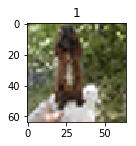

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [3]:
def read_images_classes(basepath,imgSize=img_size):
    image_stack = []
    label_stack = []

    for counter, l in enumerate(labels):
        path = os.path.join(basepath, l,'*g')
        for img in glob.glob(path):
            one_hot_vector =np.zeros(len(labels),dtype=np.int16)
            one_hot_vector[counter]=1
            image = cv2.imread(img)
            im_resize = cv2.resize(image,img_shape, interpolation=cv2.INTER_CUBIC)
            image_stack.append(im_resize)
            label_stack.append(labels[l])            
    return np.array(image_stack), np.array(label_stack)

X_train, y_train=read_images_classes(trainpath)
X_test, y_test=read_images_classes(testpath)

#test a sample image
print('length of train image set',len(X_train))
print('X_data shape:', X_train.shape)
print('y_data shape:', y_train.shape)

fig1 = plt.figure() 
ax1 = fig1.add_subplot(2,2,1) 
img = cv2.resize(X_train[15],(64,64), interpolation=cv2.INTER_CUBIC)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(y_train[15])
plt.show()
print(y_test)

### Defining the tensorflow model

The model should have the following layers
- input later
- conv layer 1 with 32 filters of kernel  size[5,5],
- pooling layer 1 with pool size[2,2] and stride 2
- conv layer 2 with 64 filters of kernel  size[5,5],
- pooling layer 2 with pool size[2,2] and stride 2
- dense layer whose output size is fixed in the hyper parameter: fc_size=32
- drop out layer with droput probability 0.4
- predict the class by doing a softmax on the output of the dropout layers


In [6]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train1 = to_categorical(y_train,2)
y_test1 = to_categorical(y_test,2)
print(y_test1)
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_size,img_size,num_channels)),
    layers.Conv2D(filters = 32, kernel_size= (5,5), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    layers.Conv2D(filters = 64, kernel_size= (5,5), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(2, activation='softmax')
])
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
        

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
model.summary()


### Run the tensorflow model

This section will use the model defined by the student and run the training and evaluation step

In [7]:
history = model.fit(X_train, y_train1,epochs=65, validation_data=(X_test, y_test1))


Train on 40 samples, validate on 20 samples
Epoch 1/65
40/40 [==============================] - 1s 34ms/sample - loss: 0.6934 - accuracy: 0.4750 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6961 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/65
40/40 [==============================] - 0s 5ms/sample - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/65
40/40 [==============================] - 0s 5ms/sample - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/65
40/40 [==============================] - 0s 5ms/sample - loss: 0.6948 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/65
40/40 [==============================] - 0s 5ms/sample - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6930 - accuracy: 0.5000 - v

40/40 [==============================] - 0s 6ms/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 59/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 60/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 61/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 62/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 63/65
40/40 [==============================] - 0s 5ms/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 64/65
40/40 [==============================] - 0s 6ms/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 65/65